In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Loading Data

In [100]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [101]:
df = pd.DataFrame(data)

## PreprocessingData

In [103]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [106]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [108]:
# Encoding categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

In [109]:
# Feature scaling
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

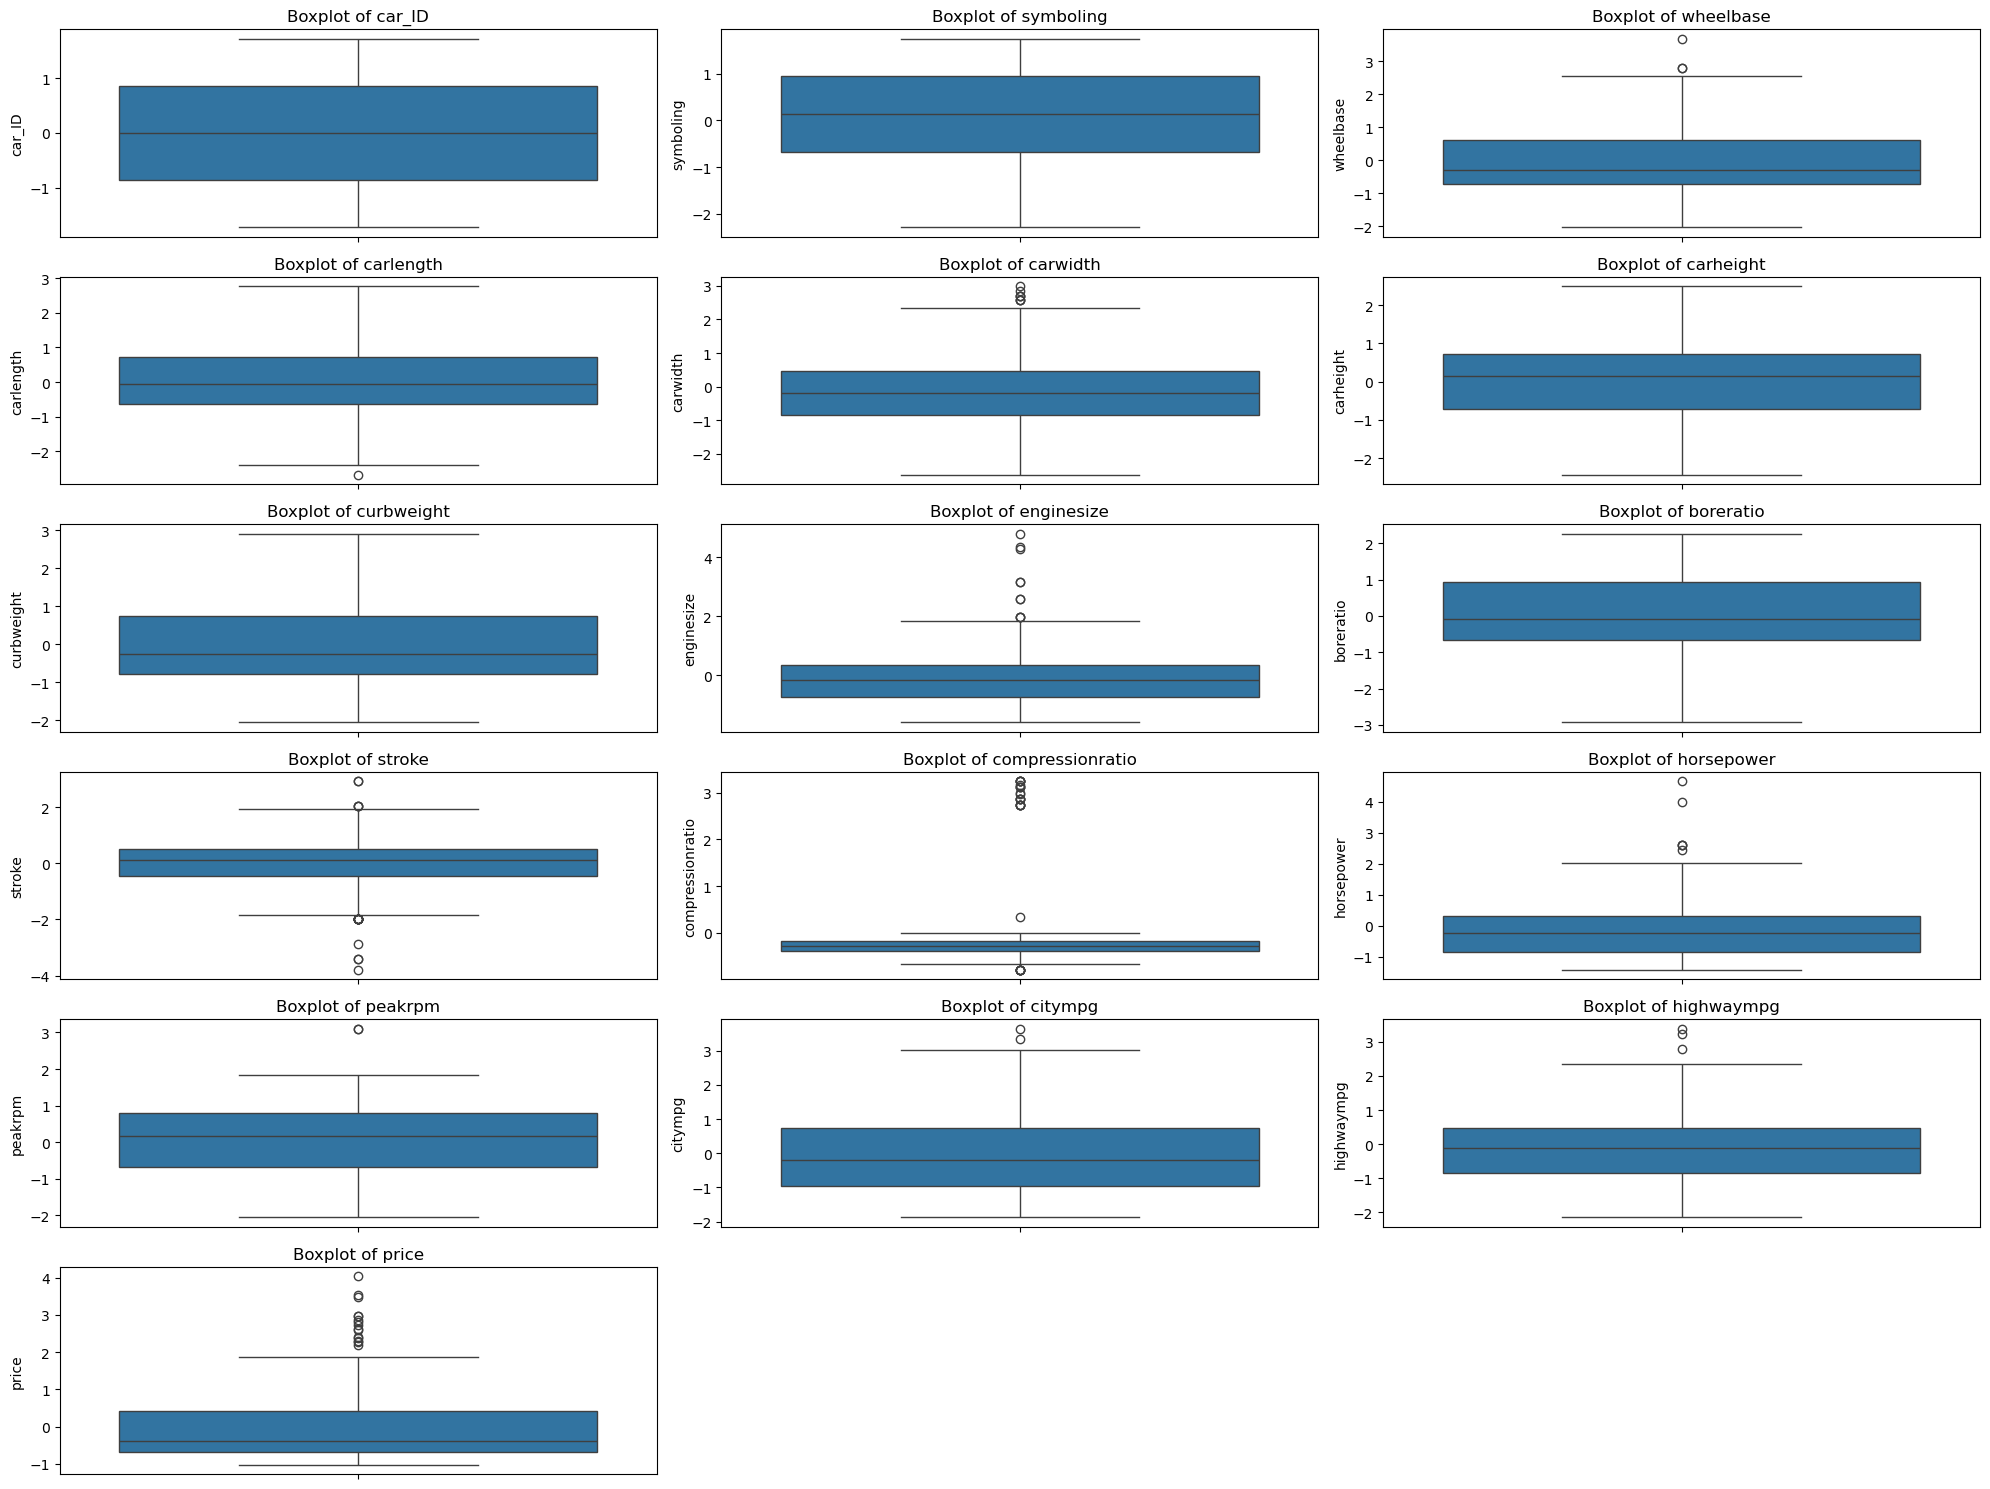

In [110]:
#Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
#Set up the plotsize
plt.figure(figsize=(20,15))
#Loop through each numerical column and draw a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3+1,3,i)
    sns.boxplot(data=df,y = column)
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()

In [111]:
#Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [112]:
#remove outliers
def remove_outliers_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df_filtered = df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]
    return df_filtered

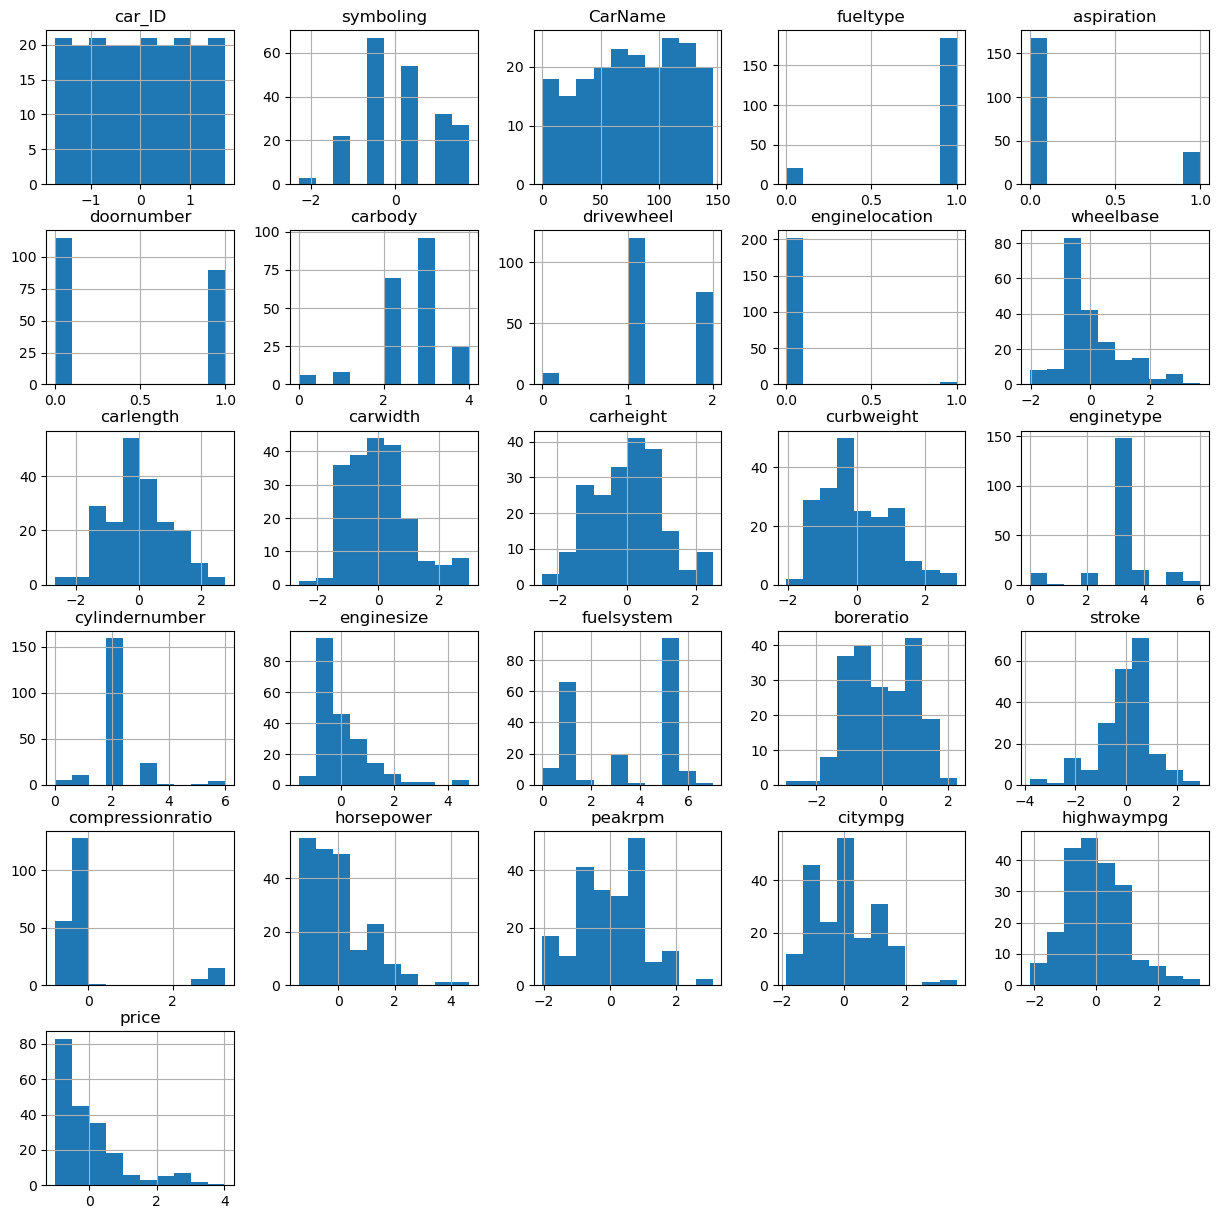

In [113]:
df.hist(figsize=(15,15))
plt.show()

C:\Users\navya\AppData\Local\Temp\ipykernel_22908\2701218987.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['carwidth'], df['carheight'], color='red', cmap='viridis')


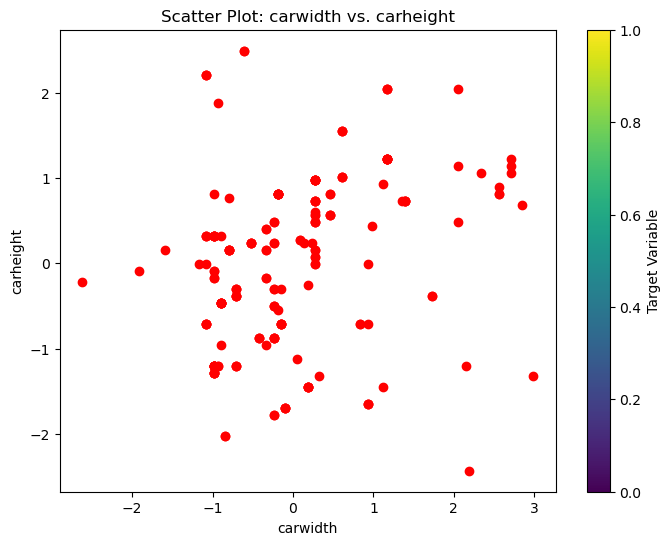

In [114]:
#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['carwidth'], df['carheight'], color='red', cmap='viridis')  
plt.xlabel('carwidth')
plt.ylabel('carheight')
plt.title('Scatter Plot: carwidth vs. carheight')
plt.colorbar(label='Target Variable')
plt.show()

## Model Implementation

In [116]:
# Initialize models
models={"Linear Regression":LinearRegression(),
 "Decision Tree Regressor":DecisionTreeRegressor(random_state=42),
"Random Forest Regressor":RandomForestRegressor(random_state=42),
"Gradient Boosting Regressor":GradientBoostingRegressor(random_state=42),
"Support Vector Regressor":SVR()}

## Model Evaluation 
#### We will compare the performance of each model based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE):

In [118]:

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}
    

In [120]:
for model_name, metrics in model_scores.items():
    print(f"Model: {model_name}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("-" * 20)

Model: Linear Regression
  MAE: 0.2619
  MSE: 0.1938
  RMSE: 0.4402
  R-squared: 0.8441
--------------------
Model: Decision Tree Regressor
  MAE: 0.2517
  MSE: 0.1473
  RMSE: 0.3838
  R-squared: 0.8815
--------------------
Model: Random Forest Regressor
  MAE: 0.1668
  MSE: 0.0552
  RMSE: 0.2348
  R-squared: 0.9556
--------------------
Model: Gradient Boosting Regressor
  MAE: 0.2001
  MSE: 0.0831
  RMSE: 0.2883
  R-squared: 0.9331
--------------------
Model: Support Vector Regressor
  MAE: 0.4819
  MSE: 0.7778
  RMSE: 0.8819
  R-squared: 0.3743
--------------------


## Feature Importance Analysis
#### For models like Random Forest Regressor, we can analyze feature importance:

In [122]:
# Feature importance using RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

In [123]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [124]:
# Print or visualize the top N important features
print("\nTop 10 Important Features:")
print(feature_importances.head(10))


Top 10 Important Features:
       Feature  Importance
16  enginesize    0.555814
13  curbweight    0.294415
24  highwaympg    0.044135
21  horsepower    0.024587
0       car_ID    0.015427
11    carwidth    0.012010
2      CarName    0.009642
10   carlength    0.006821
9    wheelbase    0.006123
22     peakrpm    0.004932


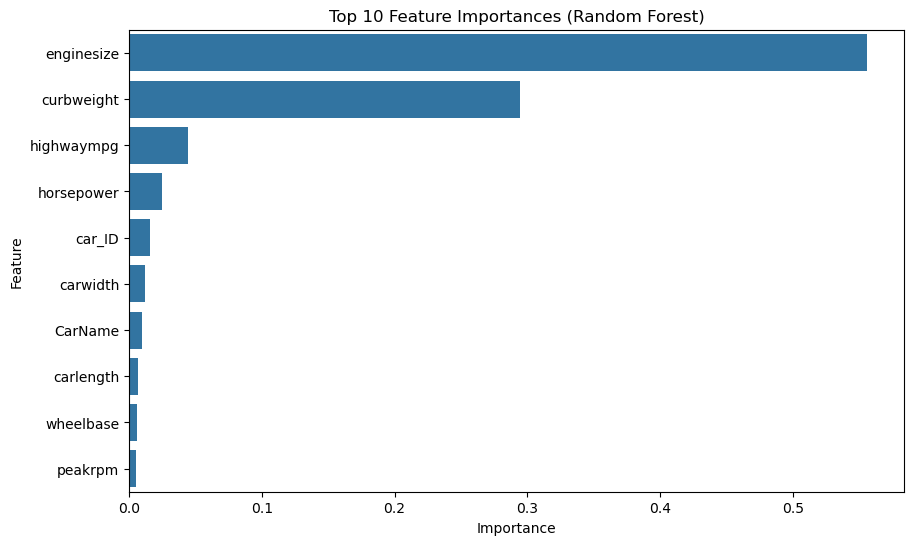

In [125]:
# Visualize feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

## Hyperparameter Tuning 
#### We can use libraries like RandomizedSearchCV for hyperparameter tuning on some models. This might improve performance:

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
# Hyperparameter tuning for RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [129]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [164]:
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [166]:
best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

In [168]:
print("Tuned Random Forest Regressor:")
print(f"  MSE: {mse_tuned:.4f}")
print(f"  RMSE: {rmse_tuned:.4f}")
print(f"  R-squared: {r2_tuned:.4f}")

Tuned Random Forest Regressor:
  MSE: 0.0562
  RMSE: 0.2371
  R-squared: 0.9548


In [170]:
# Compare with the original Random Forest
original_rf_metrics = model_scores['Random Forest Regressor']
print("\nOriginal Random Forest Regressor:")
print(f"  MSE: {original_rf_metrics['MSE']:.4f}")
print(f"  RMSE: {original_rf_metrics['RMSE']:.4f}")
print(f"  R-squared: {original_rf_metrics['R-squared']:.4f}")


Original Random Forest Regressor:
  MSE: 0.0552
  RMSE: 0.2348
  R-squared: 0.9556


In [172]:
if mse_tuned < original_rf_metrics['MSE']:
    print("\nHyperparameter tuning improved the model performance.")
elif mse_tuned == original_rf_metrics['MSE']:
    print("\nHyperparameter tuning did not change model performance.")
else:
    print("\nHyperparameter tuning decreased the model performance.")


Hyperparameter tuning decreased the model performance.
